In [1]:
import numpy as np
# For Data Frame manipulation
import pandas as pd

# For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To enable matplot visulization
%matplotlib inline

In [2]:
# The imported csv file(DataFrame) will be stored under the object called concrete
concrete=pd.read_csv("C:/Users/utkar/Downloads/archive (2)/concrete.csv")

# By calling .head() attribute on dataset we will get first 5 rows
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
# We will call .describe() attribute on the concrete datframe to get basic statistical data about every features on dataframe
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
# We will look in to the no.of entries and data types of entries of the dataframe by calling .info() on the object(concrete)
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

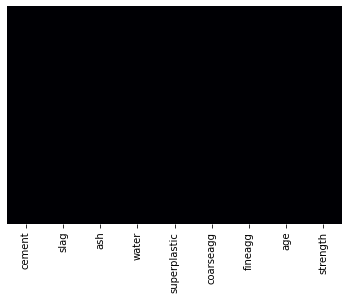

In [5]:
# We will check for the presence of null values by creating heatmap by using data in boolean format which is concrete.isnull()
sns.heatmap(concrete.isnull(),yticklabels=False,cbar=False,cmap='magma')
concrete.isnull().sum()

In [6]:
# we will check out features by calling .columns on the object(concrete)
concrete.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
# we will check wether the entire row is repeated in the form of boolean output
duplicates=concrete.duplicated()
duplicates.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [8]:
# We will drop duplicated rows by calling drop_duplicates() attribute on the object(concrete)
concrete.drop_duplicates(inplace=True)

In [9]:
# We will check for duplicates to confirm wether all the duplicates are removed
concrete.duplicated().sum()

0

Text(0.5, 1.0, 'correlaton amoung features on concrete mixture')

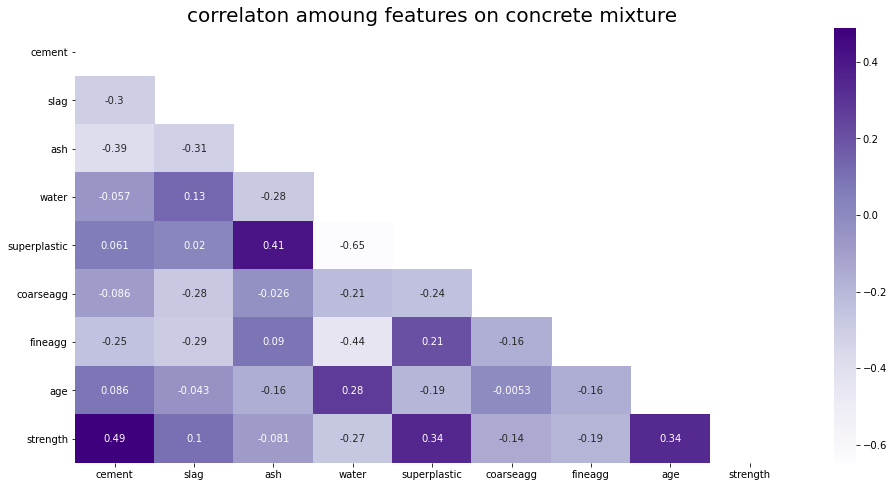

In [10]:
# We will use heatmap to draw correlation amoung every features with respect to one another

# we will create a space and set the graph size 
plt.figure(figsize=(16,8))

# We will use the variable called mask to remove the values across heatmap diagnolly as it is same on both sides
mask=np.triu(np.ones_like(concrete.corr()))

# We will creat a heatmap by calling .heatmap on sns(seaborn) library
sns.heatmap(concrete.corr(),annot=True,cmap='Purples',mask=mask)

# We will set title by callig .title on the plot
plt.title('correlaton amoung features on concrete mixture',fontsize=20)

<AxesSubplot:>

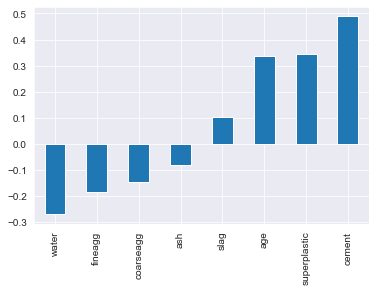

In [11]:
# We will create the correlation individually for every input features with respect to final output(compressice dtrength)

# We will set the background as dark by using .set_style()
sns.set_style('darkgrid')

# Bar plot correlation
concrete.corr()['strength'].sort_values()[:-1].plot(kind='bar')

In [12]:
# We will create x and y variable from the datasets  

# x resemble input feature
X=concrete.drop('strength',axis=1)

#y resembles output feature
y=concrete['strength']

In [13]:
# To carry out the split we will import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [14]:
# We will call split command
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# We will create an object for linear regression as lr
lr=LinearRegression()

In [17]:
# We will fit the training data to train the model(labelled data) by using .fit() call 
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
# We will see the coefficient of linaer equation once the model has trained
lr.coef_

array([ 0.11765422,  0.10065515,  0.08391336, -0.1234702 ,  0.3242327 ,
        0.01906531,  0.02415325,  0.10228679])

In [19]:
# We will create dataframe as df with coefficent as data for better undestanding
df=pd.DataFrame(data=lr.coef_,index=X.columns,columns=['coef'])

In [20]:
# We will see the dataframe by calling its name
df

,coef
cement,0.117654
slag,0.100655
ash,0.083913
water,-0.123470
superplastic,0.324233
coarseagg,0.019065
fineagg,0.024153
age,0.102287


In [21]:
# We will predict the output for test data by calling .predict() call
prediction=lr.predict(X_test)

Text(0, 0.5, 'y_test')

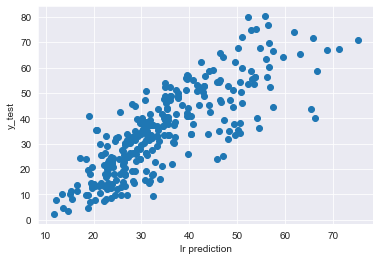

In [22]:
# We will see the relationship between the predicted value and true test value in graphical representation
plt.scatter(x=prediction,y=y_test)

# We will set x label on plot(plt)
plt.xlabel('lr prediction')

# We will set y label on plot(plt)
plt.ylabel('y_test')

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
print('RMSE',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared',r2_score(y_test,prediction))

RMSE 9.82810187059905
R squared 0.6533485292319297


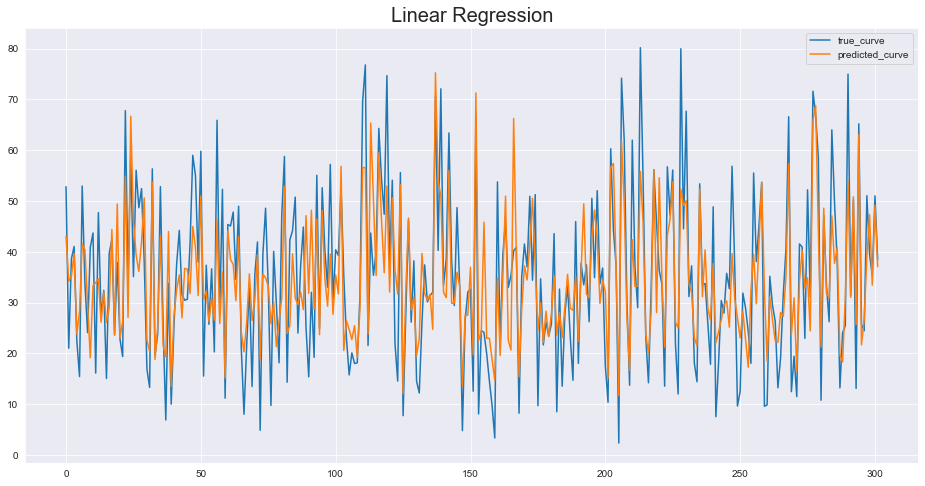

In [25]:
# we will create a space and set the graph size 
plt.figure(figsize=(16,8))

# We will create plot using labelled data
plt.plot(np.arange(len(X_test)),y_test.values,label='true_curve')

# We will create plot using predicted data
plt.plot(np.arange(len(X_test)),prediction,label='predicted_curve')

# We will set the title
plt.title('Linear Regression',fontsize=20)
plt.legend()

In [28]:
# We will import statsmodel library
import statsmodels.api as sm

AttributeError: module 'numpy' has no attribute 'MachAr'

In [29]:
# We will define the fuction as linear_regression
def linear_Regression(x,y):
    x=sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    print(model.summary())

In [30]:
# We will call the function to get result
linear_Regression(X,y)

NameError: name 'sm' is not defined

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
# We will create an object for random regression as rf with 60 sub trees
rf=RandomForestRegressor(n_estimators=60,random_state=42)

In [33]:
# We will fit the training data to train the model(labelled data) by using .fit() call 
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=60, random_state=42)

In [34]:
# We will predict the output for test data by calling .predict() call
rf_prediction=rf.predict(X_test)

Text(0, 0.5, 'y_test')

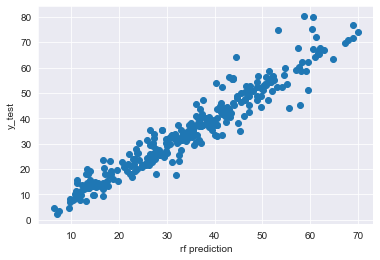

In [44]:
# We will see the relationship between the predicted value and true test value in graphical representation
plt.scatter(rf_prediction,y_test)

# We will set x label on plot(plt)
plt.xlabel('rf prediction')

# We will set y label on plot(plt)
plt.ylabel('y_test')

In [45]:
print('RMSE',np.sqrt(mean_squared_error(y_test,rf_prediction)))
print('R squared',r2_score(y_test,rf_prediction))

RMSE 4.85932916948044
R squared 0.9152565020372465


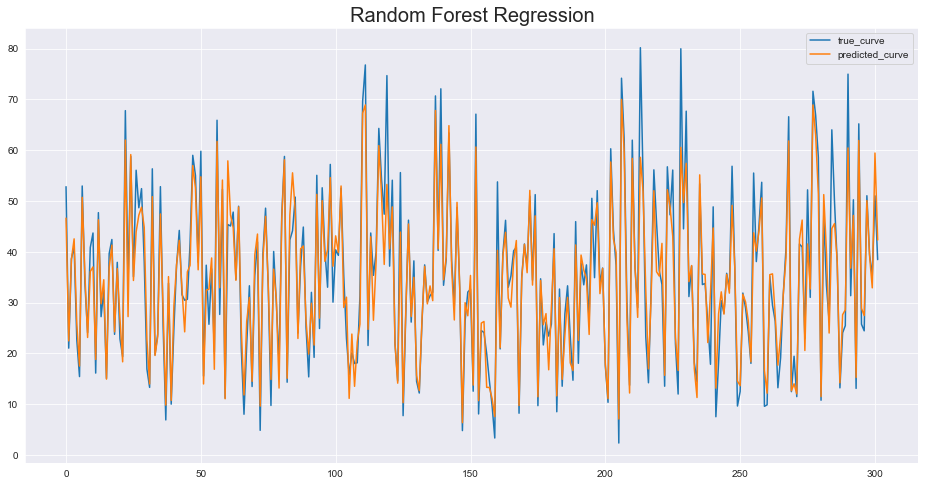

In [46]:
# We will create a space and set the graph size 
plt.figure(figsize=(16,8))

# We will create plot using labelled data
plt.plot(np.arange(len(X_test)),y_test.values,label='true_curve')

# We will create plot using predicted data
plt.plot(np.arange(len(X_test)),rf_prediction,label='predicted_curve')

# We will set the title
plt.title('Random Forest Regression',fontsize=20)
plt.legend()

In [47]:
# We will call the .feature_importances_ on the object rf
rf.feature_importances_

array([0.31085019, 0.07634682, 0.02173505, 0.09448829, 0.08503043,
       0.02936781, 0.0417098 , 0.34047162])

In [48]:
# We will create dataframe as f_importance with rf_importance as data for better undestanding
f_importance=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['value'])

# We will see the dataframe by calling its name
f_importance

,value
cement,0.310850
slag,0.076347
ash,0.021735
water,0.094488
superplastic,0.085030
coarseagg,0.029368
fineagg,0.041710
age,0.340472


In [49]:
# number of trees in random forest
n_estimators=np.arange(50,500,25)
# no of features to consider at every split
max_features=['sqrt','log2']
# minimum no of samples required to split a node
min_samples_split=[2,4]
# mimimum no of samples required at each leaf node
min_samples_leaf=[1,2]
# methode of selecting samples for training eeach tree
bootstrap=[True,False]

In [50]:
# We will crate parameter grid
param_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "bootstrap":bootstrap}

In [51]:
rf=RandomForestRegressor()

In [52]:
# W e will import Gridsearchcv from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# We will create object called rf_grid
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [53]:
# W e will fit train data 
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475])},
             verbose=2)

In [54]:
# We will get the best parameters by calling .best_params_ on object(rf_grid)
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 75}

In [55]:
# We will predict create rf with best parameters
rf=RandomForestRegressor(bootstrap= False,
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split=4,
 n_estimators=200)

In [56]:
# We will fit train data by applying best parameters
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=4,
                      n_estimators=200)

In [57]:
# We will predict x_test data by .predict call
pred=rf.predict(X_test)

In [58]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R squared',r2_score(y_test,pred))

RMSE 4.790325978461628
R squared 0.9176461543469011


In [59]:
print('R squared value on train data =',rf_grid.score(X_train,y_train))
print('R squared value on test data =',rf_grid.score(X_test,y_test))

R squared value on train data = 0.9915194969864098
R squared value on test data = 0.9178540496977733


In [64]:
X_inp=pd.Series([151.8,178.1,138.7,167.5,18.3,944,694.6,28,36.35])


In [68]:
pred_val=rf.predict([[151.8,178.1,138.7,167.5,18.3,944,694.6,28,]])

D:\Users\utkar\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [69]:
pred_val

array([36.49055])